# Versuch 1: Statistik I: Würfel-Simulation

In [2]:
#Name:
#Matrikelnummer:
#E-Mail-Adresse:
#Studiengang:
#Wiederholen Sie das Praktikum (Ja/Nein)?

#Name:
#Matrikelnummer:
#E-Mail-Adresse:
#Studiengang:
#Wiederholen Sie das Praktikum (Ja/Nein)?

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausführen der Versuche unterschiedliche Werte. Führen Sie den Code jeder einzelnen Aufgabe daher mindestens dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen in Ihrem Protokoll beantworten.

##### Aufgabenstellung: 
Für die folgenden Aufgaben werden die Ergebnisse von Würfelwürfen untersucht. <br><br>
a) Berechnen Sie zunächst (auf Papier) den Erwartungswert, sowie die Standardabweichung eines 6-seitigen Würfels, für die Augensumme von i) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
b) Berechnen Sie zunächst den Erwartungswert, sowie die Standardabweichung eines 20-seitigen Würfels, für i) die Augenzahl eines Würfels, sowie für die Augensumme von ii) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
c) Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment. Dabei soll ein 20-seitiger Würfel i) $n = 100$ mal, ii) $n = 1000$ und iii) $n = 10000$ mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b). <br><br>
d) Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. Dabei sollen i) zwei, ii) fünf und iii) zehn 20-seitige Würfel je 1000 mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). <br><br>
e) Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen?  <br><br>
f) Führen Sie mit den Werten aus d) mit Hilfe der Funktion chi_squared(x = points, sigma, mu, save = "example") einen Fit durch. Dabei wird eine Gaußfunktion als theoretische Funktion verwendet. Vergleichen sie die $\chi ^2$ Werte. Welcher Wert ist besonders hoch/gering und woran könnte das liegen? <br><br>
g) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels i) mindestens einmal die 20 fällt? ii) höchstens 2 mal die 1 fällt? iii) genau 3 mal die 5 fällt? iv) genau 3 mal die 5 UND höchstens 2 mal die 1 (Tipp: Baumdiagramm kann helfen)


##### Bemerkung: 
Sie können gerne auch mit anderen Werten herumspielen, um ein besseres Gefühl für die Zusammenhänge zu bekommen. Verwenden Sie in diesem Fall die entsprechende Funktion ohne das save-Argument, also dice(n, m, k) anstatt dice(n, m, k, save). Für die Auswertung sind der Werte aus der Aufgabenstellung relevant.

##### Speichern: 
In Ihrem Browser über Drucken->Print as PDF (Speichern als PDF)

In [3]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

In [4]:
def dice (n, m, k, save = False):                                       
    
    """
    dice(n, m, k, save) 
    n = Anzahl der Würfelwürfe (Integer), 
    m = Anzahl der Würfel (Integer), 
    k = Anzahl der Würfelseiten (Integer) 
    save = Name des PDFs (String)
    
    Funktion plottet Histogramm eines simulierten Würfelexperiments, inklusive Markierung für den Mittelwert
    und gibt den Array, den Mittelwert und die Standardabweichung der 
    Augensummen aus. Zumdem wird ein PDF erstellt, falls save übergeben wird
    """
    m1 = m
    k1 = k
    dice_matrix=np.array([])                                            #leeres Array zum Auffüllen
    for i in range (n):
        dice_row=np.array([])
        for j in range (m):
            dice_row=np.append(dice_row,[rnd.randint(1,k+1)])           #m-er Reihe wird erzeugt. Gefüllt durch Randoms
        dice_matrix= np.append(dice_matrix,[dice_row])                  #n-te m-er Reihe wird dem Array hinzugefügt
    dice_sum = sum(dice_matrix.reshape(n,m).transpose())                #Summe der Augenzahlen
    plt.hist(dice_sum, bins = (k-1)*m+1, 
             range = (m, m*k), color = 'limegreen' , density = True)    #Histogram mit relativen Häufigkeit
    plt.axvline(np.mean(dice_sum),color='black' ,linestyle='--')        #vertikale Linie des Mittelwertes
    plt.xlabel("Augenzahl")                                             #Bezeichnung x-Achse
    plt.ylabel("Relative Häufigkeit")                                   #Bezeichnung y-Achse
    if (save != False):                                                 #wenn save ein String s ist, wird ein PDF mit dem Namen s gespeichert
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()                                                          #Plot
    print ("Arithmetisches Mittel: ", np.mean(dice_sum), "\nEmpirische Standardabweichung: ", np.std(dice_sum) )              
    return (dice_sum, np.mean(dice_sum), np.std(dice_sum), k1, m1 )             #Array, Mittelwert und Standardabweichung der Augensummen


def gauss(sigma, mu, x):
    a = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)
    return a   

def chi_squared(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    a= sum((((gauss(sigma, mu, A[1][:-1]) - A[0]) **2) /gauss(sigma, mu, A[1][:-1])))
    plt.plot(np.linspace(0, m*k+2, 1000), gauss(sigma, mu, np.linspace(0, m*k+2, 1000)), 'r')
    plt.xlabel("Augenzahl")
    plt.ylabel("Relative Häufigkeit")
    if (save != False):
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()
    print("chi-Quadrat:", a )
    pass


# Aufgabe 1a)
Erwartungswerte von 6-seitigen Würfeln
## 1 Würfel:
Alle 6 Werte des Würfels sind gleich wahrscheinlich mit der Wahrscheinlichkeit 1/6. <br>
Der Erwartungswert $µ$ ist damit $1*1/6 + 2 * 1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6 = µ = 3.5$ <br>
Die Standardabweichung ist $math.sqrt(1/6*(3.5 - 1)**2 + 1/6*(3.5 - 2)**2 + 1/6*(3.5 - 3)**2 + 1/6*(3.5 - 4)**2 + 1/6*(3.5 - 5)**2 + 1/6*(3.5 - 6)**2) = math.sqrt(17.5/6) ≈ 1.71$
    
## 2 Würfel:
Da einzelne Würfelwürfe unabhängig von einander sind und für den Erwartungswert Linearität gilt, ist der Erwartungswert für $n$ Würfel $n*3.5$ <br>
In diesem Fall also $µ = 2*3.5 = 7$
    
Die Standardabweichung ist: <br>
$math.sqrt( 1/36*(7 - 2)**2 + 2/36*(7 - 3)**2 + 3/36*(7 - 4)**2 + 4/36*(7 - 5)**2 + 5/36*(7 - 6)**2 + 6/36*(7 - 7)**2 + 5/36*(7 - 8)**2 + 4/36*(7 - 9)**2 + 3/36*(7 - 10)**2 + 2/36*(7 - 11)**2 + 1/36*(7 - 12)**2) = math.sqrt(35/6) = math.sqrt(2 * 17.5/6) ≈ 2.42$ <br>
Für die Varianz gilt bei unabhängigen Würfelwürfen ebenfalls Linearität, diese lässt sich da die Wurzelfunktion monoton ist auch auf die Standardabweichung übertragen. <br>
Die Standardabweichung für zwei Würfel ist die eines Würfels mal den Faktor $math.sqrt(2)$.
    
## 5 Würfel:
Erwartungswert µ = 5*3.5 = 17.5 <br>
Standardabweichung σ = math.sqrt(5 * 17.5/6) ≈ 3.82
    
## 10 Würfel:
Erwartungswert µ = 10*3.5 = 35 <br>
Standardabweichung σ = math.sqrt(10 * 17.5/6) ≈ 5.4

In [6]:
#Aufgabe 1b)

"""
Hier können Sie kommentieren:
Auf Papier




"""

'\nHier können Sie kommentieren:\nAuf Papier\n\n\n\n\n'

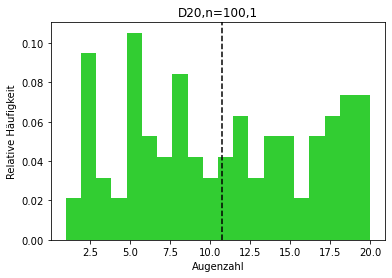

Arithmetisches Mittel:  10.73 
Empirische Standardabweichung:  5.944501661199196


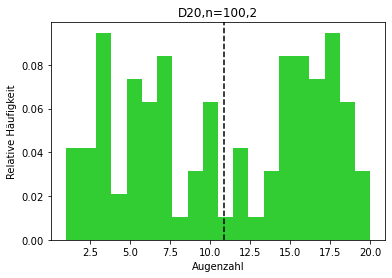

Arithmetisches Mittel:  10.86 
Empirische Standardabweichung:  6.029958540487654


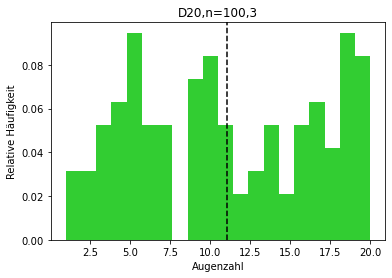

Arithmetisches Mittel:  11.04 
Empirische Standardabweichung:  5.978160252117703


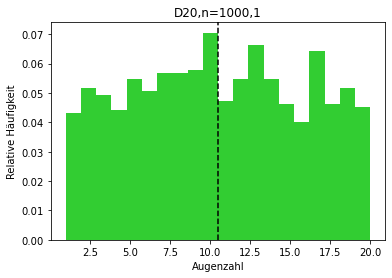

Arithmetisches Mittel:  10.525 
Empirische Standardabweichung:  5.569144907434175


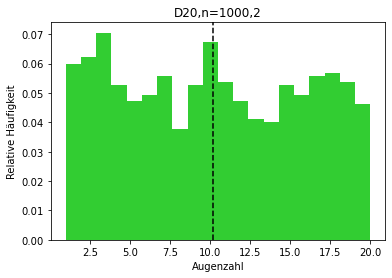

Arithmetisches Mittel:  10.196 
Empirische Standardabweichung:  5.890805038362753


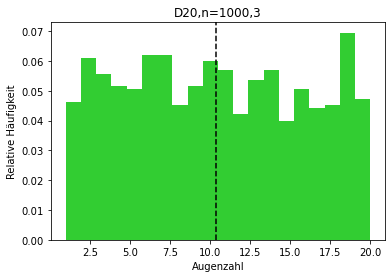

Arithmetisches Mittel:  10.35 
Empirische Standardabweichung:  5.769012047135974


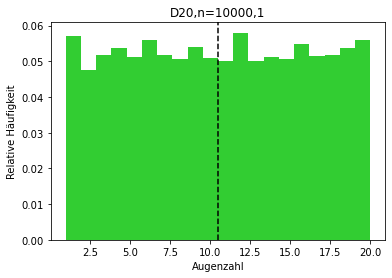

Arithmetisches Mittel:  10.5242 
Empirische Standardabweichung:  5.795257920058433


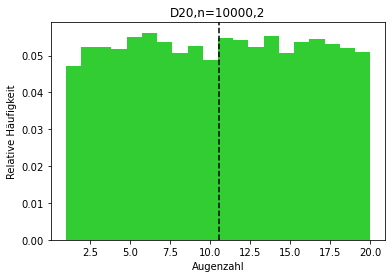

Arithmetisches Mittel:  10.5348 
Empirische Standardabweichung:  5.7275115853221985


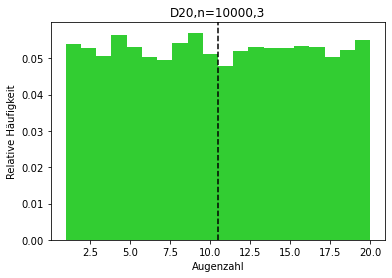

Arithmetisches Mittel:  10.4978 
Empirische Standardabweichung:  5.788315399146802
(array([ 9., 10.,  6., 12., 12., 19.,  3.,  9., 20.,  3., 15., 20.,  5.,
       10.,  6.,  8., 10., 12.,  8.,  2., 20., 20., 17., 14., 14.,  2.,
       14., 11.,  7., 15., 15., 18.,  2.,  9., 20., 13., 16.,  7.,  5.,
        8., 11.,  8., 18.,  1., 11.,  2.,  5., 16., 13.,  8.,  6., 12.,
       17., 17., 18., 19., 20., 15.,  8.,  1., 19.,  2.,  7.,  5.,  9.,
        2.,  5.,  5.,  5.,  8.,  6.,  4., 18., 19., 14.,  2.,  6., 17.,
       14., 20.,  5., 13.,  7., 11.,  4., 12., 18.,  8., 12.,  5., 17.,
       18.,  5., 19., 15., 19.,  2.,  3.,  2., 19.]), 10.73, 5.944501661199196, 20, 1) (array([ 7., 15.,  3., 19., 16., 14.,  5.,  9., 18., 11., 14., 10.,  5.,
       18., 14.,  6.,  6.,  7., 15.,  7.,  6., 20., 15.,  3., 17.,  5.,
       17.,  5., 12.,  6., 18., 19.,  7.,  7.,  3.,  3.,  3., 17.,  5.,
        5.,  2., 15., 17., 17., 17., 20., 19., 10., 16.,  1., 12.,  6.,
       18., 15., 16., 19.,  4., 20.,

In [7]:
#Aufgabe 1c)

dice1_1 = dice(n=100, m=1, k=20, save = "D20,n=100,1") #Ergebnis für 100 Würfe
dice1_2 = dice(n=100, m=1, k=20, save = "D20,n=100,2")
dice1_3 = dice(n=100, m=1, k=20, save = "D20,n=100,3")
dice2_1 = dice(n=1000, m=1, k=20, save = "D20,n=1000,1") #Ergebnis für 1000 Würfe
dice2_2 = dice(n=1000, m=1, k=20, save = "D20,n=1000,2")
dice2_3 = dice(n=1000, m=1, k=20, save = "D20,n=1000,3")
dice3_1 = dice(n=10000, m=1, k=20, save = "D20,n=10000,1") #Ergebnis für 10000 Würfe
dice3_2 = dice(n=10000, m=1, k=20, save = "D20,n=10000,2")
dice3_3 = dice(n=10000, m=1, k=20, save = "D20,n=10000,3")
print(dice1_1, dice1_2, dice1_3, dice2_1, dice2_2, dice2_3, dice3_1, dice3_2, dice3_3)

In [8]:
# Wie berechnet man den Mittelwert dreier Ergebnisse?
# Anleitung: schreiben Sie z.B. (3.1+3.2+3.3)/3
#Hier ein Testbeispiel
(3.1+3.2+3.3)/3

3.2000000000000006

In [33]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Mittelwert für 100 Würfe:
mw1 = (dice1_1[1]+dice1_2[1]+dice1_3[1])/3
s1 = (dice1_1[2]+dice1_2[2]+dice1_3[2])/3
print("Die Mittlerte der Ergebnisse bei 100 Würfen:\nMittelwert der Arithmetischen Mittelwerte:", mw1, "\nMittelwert der Empirischen Standardabweichungen:", s1)
print("Das Arithmetische Mittel weicht um", abs((mw1/10.5-1))*100, "% von dem berechneten Erwartungswert ab")
print("Die Empirische Standardabweichung weicht um", abs((s1/5.7663-1))*100, "% von der errechneten Standardabweichung ab")

Die Mittlerte der Ergebnisse bei 100 Würfen:
Mittelwert der Arithmetischen Mittelwerte: 10.876666666666665 
Mittelwert der Empirischen Standardabweichungen: 5.984206817934851
Das Arithmetische Mittel weicht um 3.5873015873015834 % von dem berechneten Erwartungswert ab
Die Empirische Standardabweichung weicht um 3.7789712282547017 % von der errechneten Standardabweichung ab


In [10]:
#Auswertung Mittelwert für 1000 Würfe:
mw2 = (dice2_1[1]+dice2_2[1]+dice2_3[1])/3
s2 = (dice2_1[2]+dice2_2[2]+dice2_3[2])/3
print("Die jeweiligen Mittlerte bei 1000 Würfen:\nArithmetisches Mittel:", mw2, "\nEmpirische Standardabweichung:", s2)
print("Das Arithmetische Mittel weicht um", abs((mw2/10.5-1))*100, "% von dem Erwartungswert ab")
print("Die Empirische Standardabweichung weicht um", abs((s2/5.7663-1))*100, "% von der errechneten Standardabweichung ab")

Die jeweiligen Mittlerte bei 1000 Würfen:
Arithmetisches Mittel: 10.357 
Empirische Standardabweichung: 5.742987330977634
Das Arithmetische Mittel weicht um 1.3619047619047642 % von dem Erwartungswert ab
Die Empirische Standardabweichung weicht um 0.40429164320909816 % von der errechneten Standardabweichung ab


In [11]:
#Auswertung Mittelwert für 10000 Würfe:
mw3 = (dice3_1[1]+dice3_2[1]+dice3_3[1])/3
s3 = (dice3_1[2]+dice3_2[2]+dice3_3[2])/3
print("Die jeweiligen Mittlerte bei 10000 Würfen:\nArithmetisches Mittel:", mw3, "\nEmpirische Standardabweichung:", s3)
print("Das Arithmetische Mittel weicht um", abs((mw3/10.5-1))*100, "% von dem Erwartungswert ab")
print("Die Empirische Standardabweichung weicht um", abs((s3/5.7663-1))*100, "% von der errechneten Standardabweichung ab")

Die jeweiligen Mittlerte bei 10000 Würfen:
Arithmetisches Mittel: 10.518933333333335 
Empirische Standardabweichung: 5.7703616348424775
Das Arithmetische Mittel weicht um 0.18031746031748064 % von dem Erwartungswert ab
Die Empirische Standardabweichung weicht um 0.07043745282897529 % von der errechneten Standardabweichung ab


In [12]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus (a)
# Anleitung: wenn 3.2 Ihr Mittelwert war, dann schreiben Sie
# np.sqrt((3.0-3.2)**2+(3.1-3.2)**2+(3.3-3.2)**2)
#Hier ein Testbeispiel
np.sqrt((3.1-3.2)**2+(3.2-3.2)**2+(3.4-3.2)**2)

0.22360679774997877

In [26]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Standardabweichung für 100 Würfe:
print("Die Standardabweichung der Werte bei 100 Würfen:\nArithmetisches Mittel:", np.sqrt((mw1-dice1_1[1])**2+(mw1-dice1_2[1])**2+(mw1-dice1_3[1])**2))
print("Empirische Standardabweichung der Empirischen Standardabweichung:", np.sqrt((s1-dice1_1[2])**2+(s1-dice1_2[2])**2+(s1-dice1_3[2])**2))

Die Standardabweichung der Werte bei 100 Würfen:
Arithmetisches Mittel: 0.22015146301277738
Empirische Standardabweichung der Empirischen Standardabweichung: 0.06087922918477827


In [14]:
#Auswertung Standardabweichung für 1000 Würfe
print("Die Standardabweichung der Werte bei 1000 Würfen:\nArithmetisches Mittel:", np.sqrt((mw2-dice2_1[1])**2+(mw2-dice2_2[1])**2+(mw2-dice2_3[1])**2))
print("Empirische Standardabweichung:", np.sqrt((s2-dice2_1[2])**2+(s2-dice2_2[2])**2+(s2-dice2_3[2])**2))

Die Standardabweichung der Werte bei 1000 Würfen:
Arithmetisches Mittel: 0.23279604807642293
Empirische Standardabweichung: 0.22967052203358282


In [15]:
#Auswertung Standardabweichung für 1000 Würfe
print("Die Standardabweichung der Werte bei 10000 Würfen:\nArithmetisches Mittel:", np.sqrt((mw3-dice3_1[1])**2+(mw3-dice3_2[1])**2+(mw3-dice3_3[1])**2))
print("Empirische Standardabweichung:", np.sqrt((s3-dice3_1[2])**2+(s3-dice3_2[2])**2+(s3-dice3_3[2])**2))

Die Standardabweichung der Werte bei 10000 Würfen:
Arithmetisches Mittel: 0.02694636648356693
Empirische Standardabweichung: 0.052709481254702255


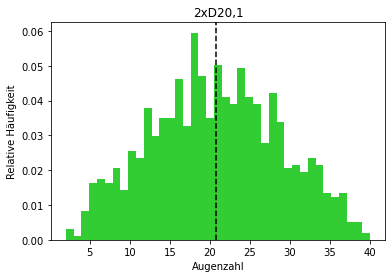

Arithmetisches Mittel:  20.715 
Empirische Standardabweichung:  8.251410485486709


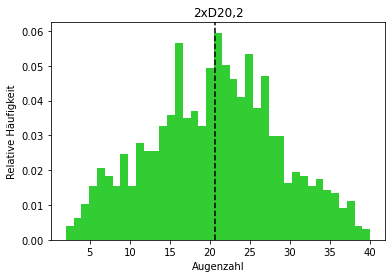

Arithmetisches Mittel:  20.593 
Empirische Standardabweichung:  8.28102354784721


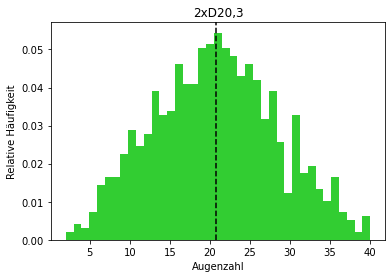

Arithmetisches Mittel:  20.696 
Empirische Standardabweichung:  7.873219417747736


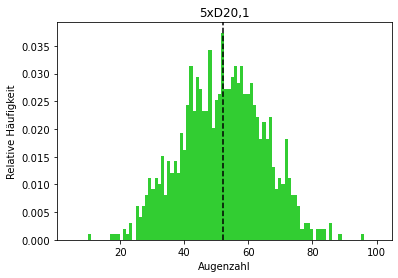

Arithmetisches Mittel:  52.075 
Empirische Standardabweichung:  12.97541425157594


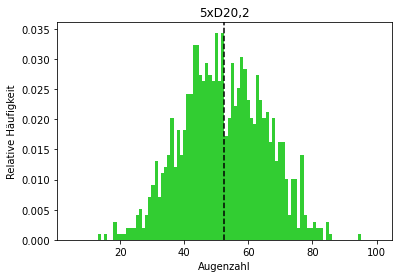

Arithmetisches Mittel:  52.283 
Empirische Standardabweichung:  13.158453974536673


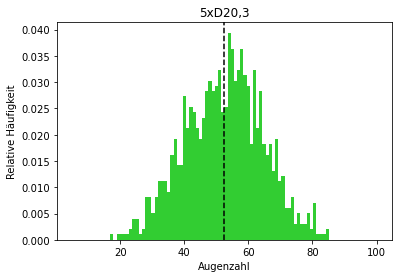

Arithmetisches Mittel:  52.445 
Empirische Standardabweichung:  12.292395006669773


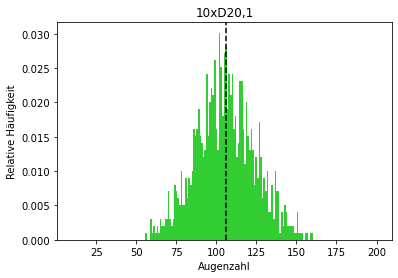

Arithmetisches Mittel:  105.832 
Empirische Standardabweichung:  18.562752382122646


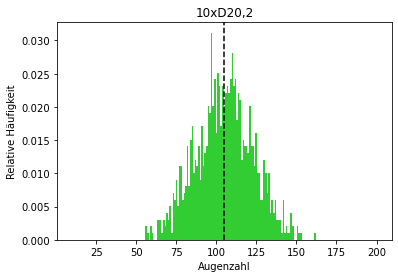

Arithmetisches Mittel:  104.775 
Empirische Standardabweichung:  17.953060324078454


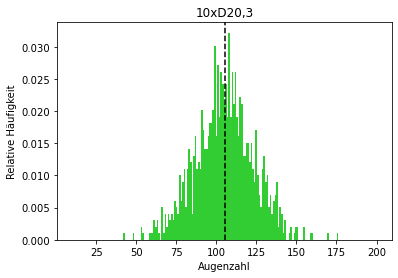

Arithmetisches Mittel:  105.165 
Empirische Standardabweichung:  18.43973359352027
(array([13., 10., 15., 34., 19., 32., 19., 30., 19.,  9., 19., 23., 18.,
       13., 28., 27., 21., 25., 13., 23., 33., 24., 14., 19., 18., 17.,
       32., 14.,  4., 17., 20., 16., 19., 15.,  5., 27., 13., 21., 33.,
       28., 14., 17., 13., 19., 16., 21., 31., 23.,  8., 20., 20.,  7.,
       21., 24.,  6., 24., 16., 19., 25., 19., 21., 38., 27., 29., 23.,
       20., 14., 17., 40., 11., 16., 22., 23., 30., 29., 22., 15., 18.,
       25., 31., 18., 25., 13., 12., 28., 32., 29., 32., 34., 23., 21.,
       30.,  5., 24., 11.,  7., 21., 26., 14., 13.,  4., 26.,  8., 21.,
       14., 12.,  5., 21., 16., 21., 18., 18., 10.,  4., 28., 16., 35.,
       32., 23., 34., 19., 16., 18., 23., 16., 21., 28., 39., 28., 19.,
       36., 19., 18., 26., 19., 18., 22., 32., 13.,  6., 21., 36., 27.,
       19., 27., 11., 25., 27., 33., 20., 20., 33., 17.,  9., 34., 35.,
       13., 30., 25., 29., 28., 25.,  4., 19., 20., 

In [16]:
#Aufgabe 1d)
dice4_1 = dice(n=1000, m=2, k=20, save = "2xD20,1") #Ergebnis für 2 Würfel
dice4_2 = dice(n=1000, m=2, k=20, save = "2xD20,2")
dice4_3 = dice(n=1000, m=2, k=20, save = "2xD20,3")
dice5_1 = dice(n=1000, m=5, k=20, save = "5xD20,1") #Ergebnis für 5 Würfel
dice5_2 = dice(n=1000, m=5, k=20, save = "5xD20,2")
dice5_3 = dice(n=1000, m=5, k=20, save = "5xD20,3")
dice6_1 = dice(n=1000, m=10, k=20, save = "10xD20,1") #Ergebnis für 10 Würfel
dice6_2 = dice(n=1000, m=10, k=20, save = "10xD20,2")
dice6_3 = dice(n=1000, m=10, k=20, save = "10xD20,3")
print(dice4_1, dice4_2, dice4_3, dice5_1, dice5_2, dice5_3, dice6_1,dice6_2, dice6_3)

In [29]:
#Auswertung Mittelwert für 2 Würfel
MW2 = (dice4_1[1]+dice4_2[1]+dice4_3[1])/3
print("Der Mittelwert der Mittelwerte liegt bei 2 Würfeln bei:",MW2)
print("Mit einer Standardabweichung von:",np.sqrt((MW2-dice4_1[1])**2+(MW2-dice4_2[1])**2+(MW2-dice4_3[1])**2))
print("Das ist eine Abweichung vom berechneten Erwartungswert von", (abs(MW2/21-1)*100), "%")

Der Mittelwert des Mittelwertes liegt bei 2 Würfeln bei: 20.668000000000003
Mit einer Standardabweichung von: 0.09283318372220181
Das ist eine Abweichung vom berechneten Erwartungswert von 1.5809523809523718 %


In [31]:
#Auswertung Mittelwert für 5 Würfel
MW5 = (dice5_1[1]+dice5_2[1]+dice5_3[1])/3
print("Der Mittelwert der Mittelwerte liegt bei 5 Würfeln bei:",MW5)
print("Mit einer Standardabweichung von:",np.sqrt((MW5-dice5_1[1])**2+(MW5-dice5_2[1])**2+(MW5-dice5_3[1])**2))
print("Das ist eine Abweichung vom Erwartungswert von", (abs(MW5/52.5-1)*100), "%")

Der Mittelwert des Mittelwertes liegt bei 5 Würfeln bei: 52.26766666666666
Mit einer Standardabweichung von: 0.26230262420850026
Das ist eine Abweichung vom Erwartungswert von 0.4425396825396888 %


In [34]:
#Auswertung Mittelwert für 10 Würfel
MW10 = (dice6_1[1]+dice6_2[1]+dice6_3[1])/3
print("Der Mittelwert der Mittelwerte liegt bei 10 Würfeln bei:",MW10)
print("Mit einer Standardabweichung von:",np.sqrt((MW10-dice6_1[1])**2+(MW10-dice6_2[1])**2+(MW10-dice6_3[1])**2))
print("Das ist eine Abweichung vom Erwartungswert von", (abs(MW10/105-1)*100), "%")

Der Mittelwert des Mittelwertes liegt bei 10 Würfeln bei: 105.25733333333334
Mit einer Standardabweichung von: 0.755918425934077
Das ist eine Abweichung vom Erwartungswert von 0.24507936507935923 %


In [36]:
#Auswertung Standardabweichung für 2 Würfel
S2 = (dice4_1[2]+dice4_2[2]+dice4_3[2])/3
print("Der Mittelwert der empirischen Standardabweichungen liegt bei 2 Würfeln bei:",S2)
print("Mit einer Standardabweichung von:",np.sqrt((S2-dice4_1[2])**2+(S2-dice4_2[2])**2+(S2-dice4_3[2])**2))
print("Das ist eine Abweichung von der errechneten Standardabweichung von", (abs(S2/8.1548-1)*100), "%")

Der Mittelwert der empirischen Standardabweichungen liegt bei 2 Würfeln bei: 8.135217817027218
Mit einer Standardabweichung von: 0.3215636928645711
Das ist eine Abweichung von der errechneten Standardabweichung von 0.2401307570115918 %


In [37]:
#Auswertung Standardabweichung für 5 Würfel
S5 = (dice5_1[2]+dice5_2[2]+dice5_3[2])/3
print("Der Mittelwert der empirischen Standardabweichungen liegt bei 5 Würfeln bei:",S5)
print("Mit einer Standardabweichung von:",np.sqrt((S5-dice5_1[2])**2+(S5-dice5_2[2])**2+(S5-dice5_3[2])**2))
print("Das ist eine Abweichung von der errechneten Standardabweichung von", (abs(S5/12.8938-1)*100), "%")

Der Mittelwert der empirischen Standardabweichungen liegt bei 5 Würfeln bei: 12.808754410927461
Mit einer Standardabweichung von: 0.645517096317986
Das ist eine Abweichung von der errechneten Standardabweichung von 0.6595851422586008 %


In [38]:
#Auswertung Standardabweichung für 10 Würfel
S10 = (dice6_1[2]+dice6_2[2]+dice6_3[2])/3
print("Der Mittelwert der empirischen Standardabweichung liegt bei 10 Würfeln bei:",S10)
print("Mit einer Standardabweichung von:",np.sqrt((S10-dice6_1[2])**2+(S10-dice6_2[2])**2+(S10-dice6_3[2])**2))
print("Das ist eine Abweichung von der errechneten Standardabweichung von", (abs(S10/18.2346-1)*100), "%")

Der Mittelwert der empirischen Standardabweichung liegt bei 10 Würfeln bei: 18.31851543324046
Mit einer Standardabweichung von: 0.45596377750158534
Das ist eine Abweichung von der errechneten Standardabweichung von 0.4601989253422589 %


In [23]:
#Aufgabe 1e) 

"""
Hier können Sie kommentieren:
Ja die Ergebnisse entsprechen meinen Erwartungen.
Bei mehr Würfeln werden die Ergebnisse genauer, d.h sie liegen näher an den berechneten Werten



"""
#Hier noch mehr

'\nHier können Sie kommentieren:\nJa die Ergebnisse entsprechen meinen Erwartungen.\n\n\n\n\n'

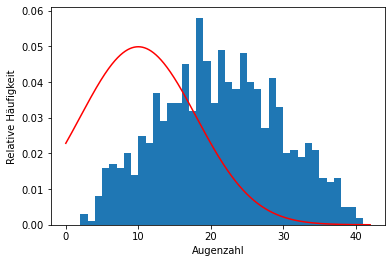

chi-Quadrat: 6.14903844593492
None


In [41]:
#f)


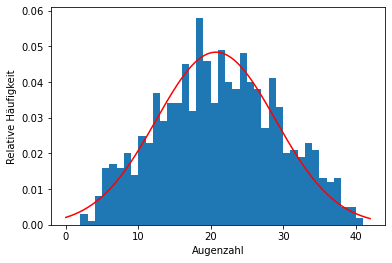

chi-Quadrat: 0.06152664123126401


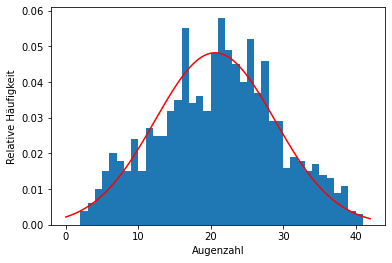

chi-Quadrat: 0.06353377962249583


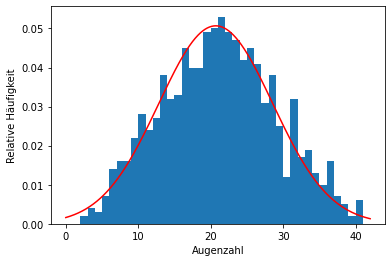

chi-Quadrat: 0.047055200141631455


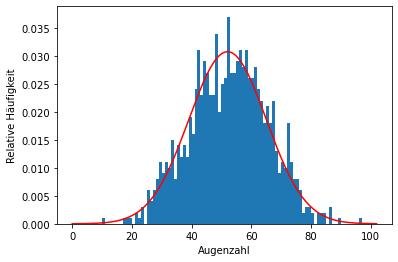

chi-Quadrat: 0.07689052925486078


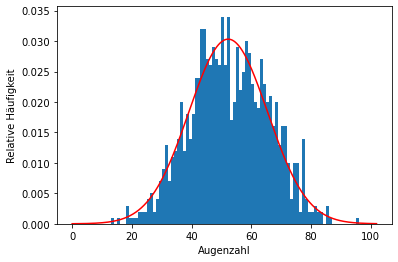

chi-Quadrat: 0.08526465667144383


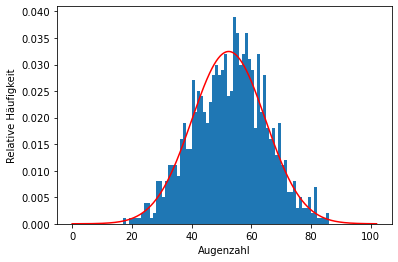

chi-Quadrat: 0.0648834651103013


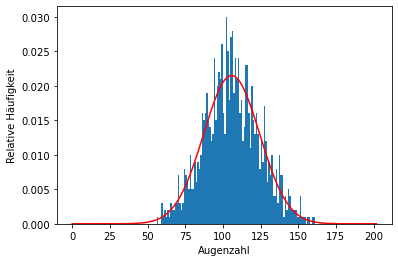

chi-Quadrat: 0.10127154194202043


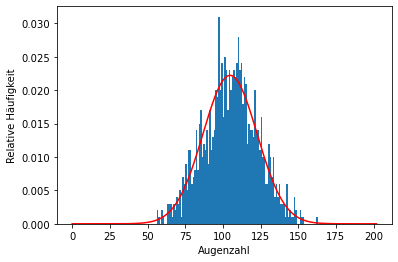

chi-Quadrat: 0.09753418886109118


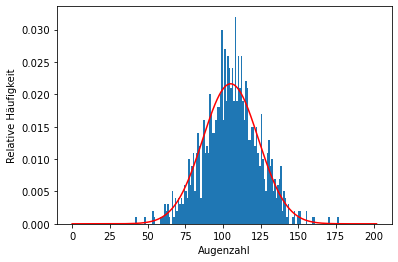

chi-Quadrat: 0.21558066308339308


In [40]:
#Aufgabe 1f)
#Wo ist der Fit?
chi_squared(dice4_1, sigma = dice4_1[2], mu = dice4_1[1])
chi_squared(dice4_2, sigma = dice4_2[2], mu = dice4_2[1])
chi_squared(dice4_3, sigma = dice4_3[2], mu = dice4_3[1])
chi_squared(dice5_1, sigma = dice5_1[2], mu = dice5_1[1])
chi_squared(dice5_2, sigma = dice5_2[2], mu = dice5_2[1])
chi_squared(dice5_3, sigma = dice5_3[2], mu = dice5_3[1])
chi_squared(dice6_1, sigma = dice6_1[2], mu = dice6_1[1])
chi_squared(dice6_2, sigma = dice6_2[2], mu = dice6_2[1])
chi_squared(dice6_3, sigma = dice6_3[2], mu = dice6_3[1])

In [25]:
#Aufgabe 1g)

"""
Hier können Sie kommentieren:
Je mehr Würfel, desto größer wird chi^2
Weil es mehr "Extremfälle" gibt



"""

'\nHier können Sie kommentieren:\nJe mehr Würfel, desto größer wird chi^2\nWeil es mehr "Extremfälle" gibt\n\n\n\n'